In [1]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/cifar10-python/cifar-10-python.tar.gz
/kaggle/input/cifar10-python/cifar-10-batches-py/data_batch_1
/kaggle/input/cifar10-python/cifar-10-batches-py/data_batch_2
/kaggle/input/cifar10-python/cifar-10-batches-py/batches.meta
/kaggle/input/cifar10-python/cifar-10-batches-py/test_batch
/kaggle/input/cifar10-python/cifar-10-batches-py/data_batch_3
/kaggle/input/cifar10-python/cifar-10-batches-py/data_batch_5
/kaggle/input/cifar10-python/cifar-10-batches-py/data_batch_4
/kaggle/input/cifar10-python/cifar-10-batches-py/readme.html


In [2]:
import tensorflow as tf
from tensorflow.keras import datasets,layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D
from keras.layers.core import Flatten
from tensorflow.keras.optimizers import SGD

In [3]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

170508288/170498071 [==============================] - 12s 0us/step


<function matplotlib.pyplot.show(close=None, block=None)>

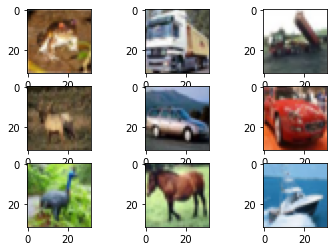

In [4]:
for i in range(9):
  plt.subplot(330 + i + 1)
  plt.imshow(X_train[i])
plt.show

In [5]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [6]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 10)
(10000, 10)


In [7]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation = 'relu', kernel_initializer='he_uniform', padding = 'same', input_shape = (32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation = 'relu', kernel_initializer='he_uniform', padding= 'same', input_shape = (32, 32, 3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3, 3), activation = 'relu', kernel_initializer='he_uniform', padding = 'same'))
model.add(Conv2D(64, (3, 3), activation = 'relu', kernel_initializer='he_uniform', padding = 'same'))
model.add(MaxPooling2D((3, 3)))
model.add(Conv2D(128, (3, 3), activation = 'relu', kernel_initializer='he_uniform', padding = 'same'))
model.add(Conv2D(128, (3, 3), activation = 'relu', kernel_initializer='he_uniform', padding = 'same'))
model.add(MaxPooling2D((3, 3)))
model.add(Flatten())
model.add(Dense(128, activation = 'relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation = 'softmax'))

2022-05-16 04:13:40.168262: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-16 04:13:40.270716: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-16 04:13:40.271538: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-16 04:13:40.273176: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [8]:
opt = SGD(lr = 0.01, momentum = 0.9)
model.compile(optimizer=opt, loss = 'categorical_crossentropy', metrics=['accuracy'])

/opt/conda/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [9]:
history = model.fit(X_train, y_train, epochs = 30, batch_size=64, validation_data=(X_test, y_test), verbose= 1)

2022-05-16 04:13:44.570979: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/30


2022-05-16 04:13:45.839299: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


782/782 [==============================] - 13s 8ms/step - loss: 1.6448 - accuracy: 0.3994 - val_loss: 1.3069 - val_accuracy: 0.5295
Epoch 2/30
782/782 [==============================] - 5s 6ms/step - loss: 1.1900 - accuracy: 0.5725 - val_loss: 1.0865 - val_accuracy: 0.6159
Epoch 3/30
782/782 [==============================] - 5s 6ms/step - loss: 0.9682 - accuracy: 0.6590 - val_loss: 0.9227 - val_accuracy: 0.6717
Epoch 4/30
782/782 [==============================] - 5s 6ms/step - loss: 0.8209 - accuracy: 0.7113 - val_loss: 0.8444 - val_accuracy: 0.7043
Epoch 5/30
782/782 [==============================] - 5s 6ms/step - loss: 0.7214 - accuracy: 0.7487 - val_loss: 0.7713 - val_accuracy: 0.7360
Epoch 6/30
782/782 [==============================] - 5s 6ms/step - loss: 0.6405 - accuracy: 0.7756 - val_loss: 0.8100 - val_accuracy: 0.7256
Epoch 7/30
782/782 [==============================] - 5s 7ms/step - loss: 0.5808 - accuracy: 0.7958 - val_loss: 0.8188 - val_accuracy: 0.7315
Epoch 8/30
782/7

In [10]:
score = model.evaluate(X_test, y_test, verbose = 1)

313/313 [==============================] - 1s 3ms/step - loss: 1.1293 - accuracy: 0.7504


In [11]:
model.save('cifar10_cnn.h5')

In [12]:
y_pred = model.predict(X_test)

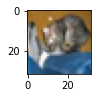

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


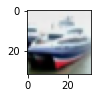

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


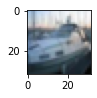

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


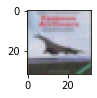

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


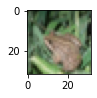

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


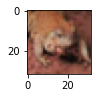

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


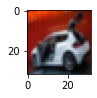

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


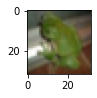

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


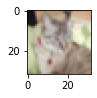

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [13]:
for i in range(9):
  plt.subplot(330 + i +1)
  plt.imshow(X_test[i])
  plt.show()  
  print(np.round(y_pred[i]))